In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression, PoissonRegressor, LinearRegression

import sys
sys.path.append('/home/rachel/Documents/lfp2spikes/modularized_code') 
from models.fit_model import MODEL_FITTING

In [2]:
print("HI")
X_df, y_df = None, None

HI


In [3]:
model_mode = "stats"
fitter = MODEL_FITTING(model_mode)

In [3]:
buffer_size = 15
splits = [1]
bin_size = 20
c = (30, 2)
spike_type = "MUA"
spike_combo = "sumExt"
origin = 'zscored'

channels = "channels_1-5"

lfp_path = f'../data_prep/data/{spike_type}/{channels}/pat66_lfps{spike_type}_df_{origin}_c{c}_b{bin_size}'
spike_path = f'../data_prep/data/{spike_type}/{channels}/pat66_spikes{spike_type}_df_b{bin_size}_c{c}'

cv_df = fitter.load_split_data(
    splits, 
    lfp_path, 
    spike_path
)

In [4]:
buffer_size = 15
splits = [1,2,3,4,5]
bin_size = 10
c = (30, 1)
spike_type = "SUA"
spike_combo = "sumExt"
origin = 'zscored'

channels = "channels_57-80"
#channels = "channels_5-40"

lfp_path = f'../data_prep/data/{spike_type}/{channels}/pat66_lfps{spike_type}_df_{origin}_c{c}_b{bin_size}'
spike_path = f'../data_prep/data/{spike_type}/{channels}/pat66_spikes{spike_type}_df_b{bin_size}_c{c}'

#cv_df = fitter.load_split_data(
#    splits, 
#    lfp_path, 
#    spike_path
#)

In [5]:
alphas = np.arange(0.0, 0.3, 0.1)
param_grid = list(zip(alphas, np.zeros_like(alphas)))
np.array(list(param_grid))[:,0]

array([0. , 0.1, 0.2])

In [ ]:
alphas = [0.0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.01, 0.1, 1.0] # 0.002, 0.004, 0.006, 0.008, 0.02, 0.04, 0.06, 0.08, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, #np.arange(0.0, 0.1, 0.001)
#alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]#np.arange(0.0, 0.1, 0.001)
param_grid = np.array(list(zip(alphas, np.zeros_like(alphas)) ))
path = f"../experiments/grid_search_alpha_L1wt/{model_mode}/gs_s{splits}_{channels}_{spike_type}_c{c}_b{bin_size}/"
print(param_grid)

fitter.grid_search_per_neuron( 
    param_grid, 
    splits, 
    lfp_path, 
    spike_path, 
    path
)

[[0.e+00 0.e+00]
 [1.e-04 0.e+00]
 [2.e-04 0.e+00]
 [3.e-04 0.e+00]
 [4.e-04 0.e+00]
 [5.e-04 0.e+00]
 [6.e-04 0.e+00]
 [7.e-04 0.e+00]
 [8.e-04 0.e+00]
 [9.e-04 0.e+00]
 [1.e-03 0.e+00]
 [1.e-02 0.e+00]
 [1.e-01 0.e+00]
 [1.e+00 0.e+00]]
START grid search per neuron
Save results in ../experiments/grid_search_alpha_L1wt/stats/gs_s[1, 2, 3, 4, 5]_channels_57-80_SUA_c(30, 1)_b10/2022_Jul_28-13_28_33/

**** Performing CV for alpha 0.0 and L1_wt 0.0 ****

>>>>>>>>> Start Split 1

--- Unit 0 ---
## FITTING ##
Log-loss: 0.01963625048058605
## VALIDATION ##
Log-cost: 0.01470287714113452
## TESTING ##

--- Unit 1 ---
## FITTING ##
Log-loss: 0.005017753352542795
## VALIDATION ##
Log-cost: 0.007687795876196843
## TESTING ##

--- Unit 2 ---
## FITTING ##
Log-loss: 0.0006192044641518312
## VALIDATION ##
Log-cost: 0.0002767994769730979
## TESTING ##

--- Unit 3 ---
## FITTING ##
Log-loss: 0.09460561421504081
## VALIDATION ##
Log-cost: 0.09911721742236278
## TESTING ##

--- Unit 4 ---
## FITTING ##


In [5]:
alphas = [0.0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.01, 0.1, 1.0] # 0.002, 0.004, 0.006, 0.008, 0.02, 0.04, 0.06, 0.08, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, #np.arange(0.0, 0.1, 0.001)
#alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]#np.arange(0.0, 0.1, 0.001)
param_grid = np.array(list(zip(alphas, np.zeros_like(alphas)) ))
path = f"../experiments/grid_search_alpha_L1wt/{model_mode}/gs_s{splits}_{channels}_{spike_type}_c{c}_b{bin_size}/"
print(param_grid)

fitter.grid_search_per_neuron( 
    param_grid, 
    cv_df, 
    path
)

[[0.e+00 0.e+00]
 [1.e-04 0.e+00]
 [2.e-04 0.e+00]
 [3.e-04 0.e+00]
 [4.e-04 0.e+00]
 [5.e-04 0.e+00]
 [6.e-04 0.e+00]
 [7.e-04 0.e+00]
 [8.e-04 0.e+00]
 [9.e-04 0.e+00]
 [1.e-03 0.e+00]
 [1.e-02 0.e+00]
 [1.e-01 0.e+00]
 [1.e+00 0.e+00]]
START grid search per neuron
Save results in ../experiments/grid_search_alpha_L1wt/stats/gs_s[1, 2, 3, 4, 5]_channels_57-80_SUA_c(10, 1)_b10/2022_Jul_28-09_42_05/

**** Performing CV for alpha 0.0 and L1_wt 0.0 ****

>>>>>>>>> Start Split 0

--- Unit 0 ---
## FITTING ##
Log-loss: 0.019265642012927107
## VALIDATION ##
Log-cost: 0.013533395492026975
## TESTING ##

--- Unit 1 ---
## FITTING ##
Log-loss: 0.004751854306495158
## VALIDATION ##
Log-cost: 0.007660671316938163
## TESTING ##

--- Unit 2 ---
## FITTING ##
Log-loss: 0.0006317910605785882
## VALIDATION ##
Log-cost: 0.00021461280271778567
## TESTING ##

--- Unit 3 ---
## FITTING ##
Log-loss: 0.09540946682693739
## VALIDATION ##
Log-cost: 0.09494314781031092
## TESTING ##

--- Unit 4 ---
## FITTING 

[0.03227718414542637,
 0.03243176525546251,
 0.03265691714972997,
 0.0329071890179251,
 0.03317072299003507,
 0.03344297395944771,
 0.03371990881466006,
 0.03400046821513648,
 0.0342837318739292,
 0.03456864947422726,
 0.03485424114789652,
 0.05787400559710194,
 0.18955527828150145,
 0.57319400517411]

In [4]:
alphas = [0.0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002, 0.004, 0.006, 0.008, 0.01, 0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]#np.arange(0.0, 0.1, 0.001)
#alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]#np.arange(0.0, 0.1, 0.001)
param_grid = np.array(list(zip(alphas, np.zeros_like(alphas)) ))
path = f"../experiments/grid_search_alpha_L1wt/{model_mode}/gs_s{splits}_{channels}_{spike_type}_c{c}_b{bin_size}/"
print(param_grid)

fitter.grid_search_per_neuron( 
    param_grid, 
    cv_df, 
    path
)

param_grid = np.array(list(zip(alphas, np.ones_like(alphas)) ))
path = f"../experiments/grid_search_alpha_L1wt/{model_mode}/gs_s{splits}_{channels}_{spike_type}_c{c}_b{bin_size}/"
print(param_grid)

fitter.grid_search_per_neuron( 
    param_grid, 
    cv_df, 
    path
)

[[0.e+00 0.e+00]
 [1.e-04 0.e+00]
 [2.e-04 0.e+00]
 [3.e-04 0.e+00]
 [4.e-04 0.e+00]
 [5.e-04 0.e+00]
 [6.e-04 0.e+00]
 [7.e-04 0.e+00]
 [8.e-04 0.e+00]
 [9.e-04 0.e+00]
 [1.e-03 0.e+00]
 [2.e-03 0.e+00]
 [4.e-03 0.e+00]
 [6.e-03 0.e+00]
 [8.e-03 0.e+00]
 [1.e-02 0.e+00]
 [2.e-02 0.e+00]
 [4.e-02 0.e+00]
 [6.e-02 0.e+00]
 [8.e-02 0.e+00]
 [1.e-01 0.e+00]
 [2.e-01 0.e+00]
 [3.e-01 0.e+00]
 [4.e-01 0.e+00]
 [5.e-01 0.e+00]
 [6.e-01 0.e+00]
 [7.e-01 0.e+00]
 [8.e-01 0.e+00]
 [9.e-01 0.e+00]
 [1.e+00 0.e+00]]
START grid search per neuron
Save results in ../experiments/grid_search_alpha_L1wt/stats/gs_s[1, 2, 3, 4, 5]_channels_5-40_SUA_c(10, 1)_b10/2022_Jul_28-00_08_46/

**** Performing CV for alpha 0.0 and L1_wt 0.0 ****

>>>>>>>>> Start Split 0

--- Unit 0 ---
## FITTING ##
Log-loss: 0.13417591457761033
## VALIDATION ##
Log-cost: 0.14020657283795027
## TESTING ##

--- Unit 1 ---
## FITTING ##
Log-loss: 0.05552939924462692
## VALIDATION ##
Log-cost: 0.06903069622163939
## TESTING ##

--- Un

/home/rachel/Documents/virtualenvs/lfp2spikes/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:1346: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")


Log-loss: 0.13419025769574092
## VALIDATION ##
Log-cost: 0.14024839688823262
## TESTING ##

--- Unit 1 ---
## FITTING ##
Log-loss: 0.05553075342983587
## VALIDATION ##
Log-cost: 0.06904156136452741
## TESTING ##

--- Unit 2 ---
## FITTING ##
Log-loss: 0.011242181486891994
## VALIDATION ##
Log-cost: 0.026157171502653204
## TESTING ##

--- Unit 3 ---
## FITTING ##
Log-loss: 0.018467682131145115
## VALIDATION ##
Log-cost: 0.01965768080904626
## TESTING ##

--- Unit 4 ---
## FITTING ##
Log-loss: 0.011731974109887595
## VALIDATION ##
Log-cost: 0.01482558909117821
## TESTING ##

--- Unit 5 ---
## FITTING ##
Log-loss: 0.005851482922072808
## VALIDATION ##
Log-cost: 0.006140723974774976
## TESTING ##

--- Unit 6 ---
## FITTING ##
Log-loss: 0.00997745656507307
## VALIDATION ##
Log-cost: 0.014995780131230926
## TESTING ##

--- Unit 7 ---
## FITTING ##
Log-loss: 0.03811379789782284
## VALIDATION ##
Log-cost: 0.04027375081217322
## TESTING ##

--- Unit 8 ---
## FITTING ##
Log-loss: 0.0647099285595

KeyboardInterrupt: 

In [5]:
#alphas = [0.0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002, 0.004, 0.006, 0.008, 0.01, 0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]#np.arange(0.0, 0.1, 0.001)
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]#np.arange(0.0, 0.1, 0.001)
param_grid = np.array(list(zip(alphas, np.zeros_like(alphas)) ))
path = f"../experiments/grid_search_alpha_L1wt/{model_mode}/gs_s{splits}_{channels}_{spike_type}_c{c}_b{bin_size}/"
print(param_grid)

fitter.grid_search_per_neuron( 
    param_grid, 
    cv_df, 
    path
)

[[0.1 0. ]
 [0.2 0. ]
 [0.3 0. ]
 [0.4 0. ]
 [0.5 0. ]
 [0.6 0. ]
 [0.7 0. ]
 [0.8 0. ]
 [0.9 0. ]
 [1.  0. ]]
START grid search per neuron
Save results in ../experiments/grid_search_alpha_L1wt/stats/gs_s[1, 2, 3, 4, 5]_channels_57-80_SUA_c(10, 1)_b1/2022_Jul_27-23_13_18/

**** Performing CV for alpha 0.1 and L1_wt 0.0 ****

>>>>>>>>> Start Split 0

--- Unit 0 ---
## FITTING ##
Log-loss: 0.17525729591280892
## VALIDATION ##
Log-cost: 0.17512217753472734
## TESTING ##

--- Unit 1 ---
## FITTING ##
Log-loss: 0.17469956396293038
## VALIDATION ##
Log-cost: 0.17475646964182426
## TESTING ##

--- Unit 2 ---
## FITTING ##
Log-loss: 0.17456578814864518
## VALIDATION ##
Log-cost: 0.17456940191235223
## TESTING ##

--- Unit 3 ---
## FITTING ##
Log-loss: 0.1791584368984802
## VALIDATION ##
Log-cost: 0.17937551975146449
## TESTING ##

--- Unit 4 ---
## FITTING ##
Log-loss: 0.17501570612469056
## VALIDATION ##
Log-cost: 0.17500574744811298
## TESTING ##

--- Unit 5 ---
## FITTING ##
Log-loss: 0.174

[0.17612003257785327,
 0.2665972137639574,
 0.3324409794413906,
 0.3843941241010917,
 0.427173581190613,
 0.4633728932582289,
 0.49460124023716356,
 0.5219350264697497,
 0.5461359844846436,
 0.5677636764687128]

In [10]:
alphas = [0.9, 1.0]#np.arange(0.0, 0.1, 0.001)
param_grid = np.array(list(zip(alphas, np.zeros_like(alphas)) ))
path = f"../experiments/grid_search_alpha_L1wt/{model_mode}/gs_s{splits}_{channels}_{spike_type}_c{c}_b{bin_size}/"
print(param_grid)

fitter.grid_search_per_neuron( 
    param_grid, 
    cv_df, 
    path
)

[[0.9 0. ]
 [1.  0. ]]
START grid search per neuron
Save results in ../experiments/grid_search_alpha_L1wt/stats/gs_s[1, 2, 3, 4, 5]_channels_5-40_SUA_c(10, 1)_b1/2022_Jul_27-18_58_51/

**** Performing CV for alpha 0.9 and L1_wt 0.0 ****

>>>>>>>>> Start Split 0

--- Unit 0 ---
## FITTING ##
Log-loss: 0.5484293789971558
## VALIDATION ##
Log-cost: 0.5485036655687472
## TESTING ##

--- Unit 1 ---
## FITTING ##
Log-loss: 0.5464727467524034
## VALIDATION ##
Log-cost: 0.5466425028645596
## TESTING ##

--- Unit 2 ---
## FITTING ##
Log-loss: 0.5456539828303324
## VALIDATION ##
Log-cost: 0.5457623882222159
## TESTING ##

--- Unit 3 ---
## FITTING ##
Log-loss: 0.5457328933067834
## VALIDATION ##
Log-cost: 0.5457832355393383
## TESTING ##

--- Unit 4 ---
## FITTING ##
Log-loss: 0.5456299171970668
## VALIDATION ##
Log-cost: 0.5457217398105514
## TESTING ##

--- Unit 5 ---
## FITTING ##
Log-loss: 0.5455367961129649
## VALIDATION ##
Log-cost: 0.5456258445518987
## TESTING ##

--- Unit 6 ---
## FITTI

[0.546413586948721, 0.5680267824993427]

In [9]:
alphas = [0.004, 0.006, 0.008, 0.01, 0.02, 0.04, 0.06, 0.08, 0.1]#np.arange(0.0, 0.1, 0.001)
param_grid = np.array(list(zip(alphas, np.zeros_like(alphas)) ))
path = f"../experiments/grid_search_alpha_L1wt/{model_mode}/gs_s{splits}_{channels}_{spike_type}_c{c}_b{bin_size}/"
print(param_grid)

fitter.grid_search_per_neuron( 
    param_grid, 
    cv_df, 
    path
)

[[0.004 0.   ]
 [0.006 0.   ]
 [0.008 0.   ]
 [0.01  0.   ]
 [0.02  0.   ]
 [0.04  0.   ]
 [0.06  0.   ]
 [0.08  0.   ]
 [0.1   0.   ]]
START grid search per neuron
Save results in ../experiments/grid_search_alpha_L1wt/stats/gs_s[1, 2, 3, 4, 5]_channels_5-40_SUA_c(10, 1)_b1/2022_Jul_27-17_55_35/

**** Performing CV for alpha 0.004 and L1_wt 0.0 ****

>>>>>>>>> Start Split 0

--- Unit 0 ---
## FITTING ##
Log-loss: 0.030788108183822167
## VALIDATION ##
Log-cost: 0.03120453410292706
## TESTING ##

--- Unit 1 ---
## FITTING ##
Log-loss: 0.021353384521686496
## VALIDATION ##
Log-cost: 0.022402829141994283
## TESTING ##

--- Unit 2 ---
## FITTING ##
Log-loss: 0.0173026541351238
## VALIDATION ##
Log-cost: 0.01794987191982484
## TESTING ##

--- Unit 3 ---
## FITTING ##
Log-loss: 0.017703385091567686
## VALIDATION ##
Log-cost: 0.017762737201453212
## TESTING ##

--- Unit 4 ---
## FITTING ##
Log-loss: 0.01723400873739268
## VALIDATION ##
Log-cost: 0.017326294304810266
## TESTING ##

--- Unit 5 -

[0.0208968061703239,
 0.026891632318162474,
 0.03245008920043636,
 0.03767795506230924,
 0.060546181202179986,
 0.09724652901849314,
 0.12740365015012492,
 0.1535211954567916,
 0.17677013179275675]

In [8]:
alphas = [0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001]#np.arange(0.0, 0.1, 0.001)
param_grid = np.array(list(zip(alphas, np.zeros_like(alphas)) ))
path = f"../experiments/grid_search_alpha_L1wt/{model_mode}/gs_s{splits}_{channels}_{spike_type}_c{c}_b{bin_size}/"
print(param_grid)

fitter.grid_search_per_neuron( 
    param_grid, 
    cv_df, 
    path
)

[[0.0002 0.    ]
 [0.0003 0.    ]
 [0.0004 0.    ]
 [0.0005 0.    ]
 [0.0006 0.    ]
 [0.0007 0.    ]
 [0.0008 0.    ]
 [0.0009 0.    ]
 [0.001  0.    ]]
START grid search per neuron
Save results in ../experiments/grid_search_alpha_L1wt/stats/gs_s[1, 2, 3, 4, 5]_channels_5-40_SUA_c(10, 1)_b1/2022_Jul_27-15_57_53/

**** Performing CV for alpha 0.0002 and L1_wt 0.0 ****

>>>>>>>>> Start Split 0

--- Unit 0 ---
## FITTING ##
Log-loss: 0.02048891763360604
## VALIDATION ##
Log-cost: 0.021070666434513437
## TESTING ##

--- Unit 1 ---
## FITTING ##
Log-loss: 0.008363684179246154
## VALIDATION ##
Log-cost: 0.00993509913477552
## TESTING ##

--- Unit 2 ---
## FITTING ##
Log-loss: 0.0025923405557312473
## VALIDATION ##
Log-cost: 0.0036048385050010344
## TESTING ##

--- Unit 3 ---
## FITTING ##
Log-loss: 0.0032242626706750765
## VALIDATION ##
Log-cost: 0.00331723352271064
## TESTING ##

--- Unit 4 ---
## FITTING ##
Log-loss: 0.0025269207688184765
## VALIDATION ##
Log-cost: 0.0026692053259417827
#

[0.06818139131235493,
 0.009678083721373628,
 0.008355737511878342,
 0.008633744054500958,
 0.009018286403359572,
 0.009412428628794753,
 0.009806152825534884,
 0.01019672510413874,
 0.010584012071382274]

In [7]:
alphas = [0.0001,0.0002]#np.arange(0.0, 0.1, 0.001)
param_grid = np.array(list(zip(alphas, np.zeros_like(alphas)) ))
path = f"../experiments/grid_search_alpha_L1wt/{model_mode}/gs_s{splits}_{channels}_{spike_type}_c{c}_b{bin_size}/"
print(param_grid)

fitter.grid_search_per_neuron( 
    param_grid, 
    cv_df, 
    path
)

[[0.0001 0.    ]
 [0.0002 0.    ]]
START grid search per neuron
Save results in ../experiments/grid_search_alpha_L1wt/stats/gs_s[1, 2, 3, 4, 5]_channels_5-40_SUA_c(10, 1)_b1/2022_Jul_27-15_40_38/

**** Performing CV for alpha 0.0001 and L1_wt 0.0 ****

>>>>>>>>> Start Split 0

--- Unit 0 ---
## FITTING ##
Log-loss: 0.020346586569434173
## VALIDATION ##
Log-cost: 0.020942453137846435
## TESTING ##

--- Unit 1 ---
## FITTING ##
Log-loss: 0.008070909229612793
## VALIDATION ##
Log-cost: 0.00971734301411937
## TESTING ##

--- Unit 2 ---
## FITTING ##
Log-loss: 0.0020749149232400406
## VALIDATION ##
Log-cost: 0.0031655936672725627
## TESTING ##

--- Unit 3 ---
## FITTING ##
Log-loss: 0.0027436048773754923
## VALIDATION ##
Log-cost: 0.0028443231078079103
## TESTING ##

--- Unit 4 ---
## FITTING ##
Log-loss: 0.002007108860002141
## VALIDATION ##
Log-cost: 0.002160443597025467
## TESTING ##

--- Unit 5 ---
## FITTING ##
Log-loss: 0.0012671090840131387
## VALIDATION ##
Log-cost: 0.00126464786013

[14.933201614142288, 0.06818139131235493]

In [6]:
alphas = [0.0,0.0001]#np.arange(0.0, 0.1, 0.001)
param_grid = np.array(list(zip(alphas, np.zeros_like(alphas)) ))
path = f"../experiments/grid_search_alpha_L1wt/{model_mode}/gs_s{splits}_{channels}_{spike_type}_c{c}_b{bin_size}/"
print(param_grid)

fitter.grid_search_per_neuron( 
    param_grid, 
    cv_df, 
    path
)


[[0.     0.    ]
 [0.0001 0.    ]]
START grid search per neuron
Save results in ../experiments/grid_search_alpha_L1wt/stats/gs_s[1, 2, 3, 4, 5]_channels_5-40_SUA_c(10, 1)_b1/2022_Jul_27-15_15_56/

**** Performing CV for alpha 0.0 and L1_wt 0.0 ****

>>>>>>>>> Start Split 0

--- Unit 0 ---
## FITTING ##
Log-loss: 0.02026005466359078
## VALIDATION ##
Log-cost: 0.020862635369256886
## TESTING ##

--- Unit 1 ---
## FITTING ##
Log-loss: 0.007891720724359176
## VALIDATION ##
Log-cost: 0.009645027117760413
## TESTING ##

--- Unit 2 ---
## FITTING ##
Log-loss: 0.0016103112006738895
## VALIDATION ##
Log-cost: 0.0029646014422091403
## TESTING ##

--- Unit 3 ---
## FITTING ##
Log-loss: 0.002364407311416774
## VALIDATION ##
Log-cost: 0.002483979939390046
## TESTING ##

--- Unit 4 ---
## FITTING ##
Log-loss: 0.001570005766789832
## VALIDATION ##
Log-cost: 0.00175675080130848
## TESTING ##

--- Unit 5 ---
## FITTING ##
Log-loss: 0.0007166254432099076
## VALIDATION ##
Log-cost: 0.0007108650740337945


[397104127.9225436, 14.933201614142288]

In [5]:
alphas = np.arange(0.0, 0.9, 0.1)
param_grid = zip(alphas, np.zeros_like(alphas)) 
path = f"../experiments/grid_search_alpha_L1wt/{model_mode}/gs_s{splits}_{channels}_{spike_type}_c{c}_b{bin_size}/"

fitter.grid_search_per_neuron( 
    param_grid, 
    cv_df, 
    path
)


START grid search per neuron
Save results in ../experiments/grid_search_alpha_L1wt/stats/gs_s[1, 2, 3, 4, 5]_channels_5-40_SUA_c(10, 1)_b1/2022_Jul_27-13_44_46/

**** Performing CV for alpha 0.0 and L1_wt 0.0 ****

>>>>>>>>> Start Split 0

--- Unit 0 ---
## FITTING ##
Log-loss: 0.02026005466359078
## VALIDATION ##
Log-cost: 0.020862635369256886
## TESTING ##

--- Unit 1 ---
## FITTING ##
Log-loss: 0.007891720724359176
## VALIDATION ##
Log-cost: 0.009645027117760413
## TESTING ##

--- Unit 2 ---
## FITTING ##
Log-loss: 0.0016103112006738895
## VALIDATION ##
Log-cost: 0.0029646014422091403
## TESTING ##

--- Unit 3 ---
## FITTING ##
Log-loss: 0.002364407311416774
## VALIDATION ##
Log-cost: 0.002483979939390046
## TESTING ##

--- Unit 4 ---
## FITTING ##
Log-loss: 0.001570005766789832
## VALIDATION ##
Log-cost: 0.00175675080130848
## TESTING ##

--- Unit 5 ---
## FITTING ##
Log-loss: 0.0007166254432099076
## VALIDATION ##
Log-cost: 0.0007108650740337945
## TESTING ##

--- Unit 6 ---
## FI

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [6]:
alphas = np.arange(0.0, 0.9, 0.1)
param_grid = zip(alphas, np.zeros_like(alphas)) 
np.array(list(param_grid))[:,0]

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

In [ ]:
alphas = np.arange(0.0, 0.9, 0.1)
param_grid = zip(alphas, np.zeros_like(alphas)) 
path = f"../experiments/grid_search_alpha_L1wt/{model_mode}/gs_s{splits}_{channels}_{spike_type}_c{c}_b{bin_size}/"

fitter.grid_search_per_neuron( 
    param_grid, 
    cv_df, 
    path
)


START grid search per neuron
Save results in ../experiments/grid_search_alpha_L1wt/stats/gs_s[1, 2, 3, 4, 5]_channels_5-40_SUA_c(10, 1)_b1/2022_Jul_27-11_12_45/

**** Performing CV for alpha 0.0 and L1_wt 1.0 ****

>>>>>>>>> Start Split 0

--- Unit 0 ---
## FITTING ##


/home/rachel/Documents/virtualenvs/lfp2spikes/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:1346: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")


Log-loss: 0.020311944091457274
## VALIDATION ##
Log-cost: 0.020915220424347757
## TESTING ##

--- Unit 1 ---
## FITTING ##
Log-loss: 0.00791146574939462
## VALIDATION ##
Log-cost: 0.009676703227615761
## TESTING ##

--- Unit 2 ---
## FITTING ##
Log-loss: 0.0016211157821450913
## VALIDATION ##
Log-cost: 0.0029795425073146503
## TESTING ##

--- Unit 3 ---
## FITTING ##
Log-loss: 0.0023729029329239656
## VALIDATION ##
Log-cost: 0.002495864765986117
## TESTING ##

--- Unit 4 ---
## FITTING ##
Log-loss: 0.0015651915668105114
## VALIDATION ##
Log-cost: 0.0017544741434287745
## TESTING ##

--- Unit 5 ---
## FITTING ##
Log-loss: 0.0007114071487007433
## VALIDATION ##
Log-cost: 0.0007078529451601831
## TESTING ##

--- Unit 6 ---
## FITTING ##
Log-loss: 0.0013158018185874185
## VALIDATION ##
Log-cost: 0.0016547133346819594
## TESTING ##

--- Unit 7 ---
## FITTING ##
Log-loss: 0.0051813167341513665
## VALIDATION ##
Log-cost: 0.0053310514987757185
## TESTING ##

--- Unit 8 ---
## FITTING ##
Log-lo

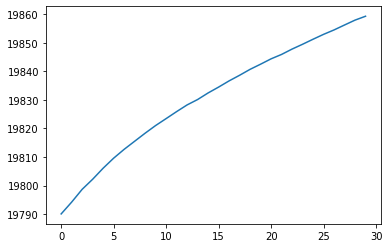

In [5]:
a = [19790.06154746782,
 19794.197050349718,
 19798.673854746172,
 19802.1977702891,
 19806.070472930438,
 19809.577361804157,
 19812.67020416771,
 19815.500269611064,
 19818.32260550103,
 19821.006038663938,
 19823.432194222427,
 19825.880224777713,
 19828.224685453664,
 19830.107909755126,
 19832.413844944418,
 19834.466167043585,
 19836.637433679043,
 19838.601635602266,
 19840.681901914522,
 19842.483149445543,
 19844.35645397964,
 19845.899840430502,
 19847.772781631706,
 19849.457895450516,
 19851.220464615,
 19852.927435786623,
 19854.47594791453,
 19856.20597338005,
 19857.912877619732,
 19859.269878240728]
plt.plot(a)

In [5]:
param_grid = [(0.0,0.0),(0.1,0.0)]
path = f"../experiments/grid_search_alpha_L1wt/gs_s{splits}_{channels}_{spike_type}_c{c}_b{bin_size}/"

fitter.grid_search_per_neuron( 
    param_grid, 
    cv_df, 
    path
)


**** Performing CV for alpha 0.0 and L1_wt 0.0 ****

>>>>>>>>> Start Split 0

--- Unit 0 ---
## FITTING ##
Log-loss: 280949.9253117741
## VALIDATION ##
Log-cost: 56601.387191606846
## TESTING ##

--- Unit 1 ---
## FITTING ##
Log-loss: 133422.42489458408
## VALIDATION ##
Log-cost: 20126.618180846697
## TESTING ##

--- Unit 2 ---
## FITTING ##
Log-loss: 41563.08016181705
## VALIDATION ##
Log-cost: 7580.77803880455
## TESTING ##

--- Unit 3 ---
## FITTING ##
Log-loss: 31389.679274998387
## VALIDATION ##
Log-cost: 4599.276371205623
## TESTING ##

--- Unit 4 ---
## FITTING ##
Log-loss: 26555.173238802294
## VALIDATION ##
Log-cost: 5313.578116374968
## TESTING ##

>>>>>>>>> End Split 0


>>>>>>>>> Start Split 1

--- Unit 0 ---
## FITTING ##
Log-loss: 291612.5615093936
## VALIDATION ##
Log-cost: 54213.088983401525
## TESTING ##

--- Unit 1 ---
## FITTING ##
Log-loss: 125492.37996449077
## VALIDATION ##
Log-cost: 25970.526183270395
## TESTING ##

--- Unit 2 ---
## FITTING ##
Log-loss: 42463.1

[19015.667499539493, 51153.518857368465]

In [8]:
model_params = {"alpha": 0.0, "L1_wt": 0.0, "cnvrg_tol": 1E-8}
model_params["alpha"]

0.0

In [6]:
model_params = {"alpha": 0.0, "L1_wt": 0.0, "cnvrg_tol": 1E-8}
fitter.cross_validation_per_neuron(
    cv_df, 
    **model_params
)


>>>>>>>>> Start Split 0

--- Unit 0 ---
## FITTING ##
Log-loss: 280949.9253117741
## VALIDATION ##
Log-cost: 56601.387191606846
## TESTING ##

--- Unit 1 ---
## FITTING ##
Log-loss: 133422.42489458408
## VALIDATION ##
Log-cost: 20126.618180846697
## TESTING ##

--- Unit 2 ---
## FITTING ##
Log-loss: 41563.08016181705
## VALIDATION ##
Log-cost: 7580.77803880455
## TESTING ##

--- Unit 3 ---
## FITTING ##
Log-loss: 31389.679274998387
## VALIDATION ##
Log-cost: 4599.276371205623
## TESTING ##

--- Unit 4 ---
## FITTING ##
Log-loss: 26555.173238802294
## VALIDATION ##
Log-cost: 5313.578116374968
## TESTING ##

>>>>>>>>> End Split 0


>>>>>>>>> Start Split 1

--- Unit 0 ---
## FITTING ##
Log-loss: 291612.5615093936
## VALIDATION ##
Log-cost: 54213.088983401525
## TESTING ##

--- Unit 1 ---
## FITTING ##
Log-loss: 125492.37996449077
## VALIDATION ##
Log-cost: 25970.526183270395
## TESTING ##

--- Unit 2 ---
## FITTING ##
Log-loss: 42463.18385093225
## VALIDATION ##
Log-cost: 5804.4341750259

(19015.667499539493,
 [[array([-2.82418148e+00, -4.05634659e-01,  1.09050381e-01,  9.77924784e-02,
           9.81099409e-02,  5.66561458e-02, -8.42164058e-02, -4.06988246e-02,
          -5.49941130e-02,  1.20639424e-01, -9.76081334e-02, -4.71723935e-02,
           1.05579868e-01,  1.40439669e-02,  5.54248603e-02, -1.31364181e-04,
           3.85926392e-02, -7.38112350e-02, -1.14540914e-03, -3.04688301e-02,
           5.67678285e-02,  2.74216583e-02,  8.14153007e-03, -5.90989668e-02,
           3.92766008e-02,  3.45709068e-02,  9.01780285e-02, -9.02759484e-02,
          -4.47406047e-02, -3.30254938e-01,  5.60988543e-01]),
   array([-3.82753680e+00, -9.02149600e-02,  2.87965398e-02,  5.65730960e-02,
           4.60833999e-02,  1.23760944e-02, -1.02290134e-03,  1.77236573e-02,
          -2.92912378e-02,  4.19164675e-02, -2.90738524e-02, -5.80298398e-02,
           3.40711496e-03,  1.16400445e-01, -1.24281258e-02,  8.29423572e-04,
           1.44534332e-02, -2.46595779e-02, -7.41168621e-0

In [4]:
model_params = {"alpha": 0.0, "L1_wt": 0.0, "cnvrg_tol": 1E-5}
fitter.cross_validation_per_neuron(
    cv_df, 
    **model_params
)


>>>>>>>>> Start Split 0

--- Unit 0 ---
## FITTING ##
Log-loss: 280949.9253117741
## VALIDATION ##
Log-cost: 56601.387191606846
## TESTING ##

--- Unit 1 ---
## FITTING ##
Log-loss: 133422.42489458408
## VALIDATION ##
Log-cost: 20126.618180846697
## TESTING ##

--- Unit 2 ---
## FITTING ##
Log-loss: 41563.08016181705
## VALIDATION ##
Log-cost: 7580.77803880455
## TESTING ##

--- Unit 3 ---
## FITTING ##
Log-loss: 31389.679274998387
## VALIDATION ##
Log-cost: 4599.276371205623
## TESTING ##

--- Unit 4 ---
## FITTING ##
Log-loss: 26555.173238802294
## VALIDATION ##
Log-cost: 5313.578116374968
## TESTING ##

>>>>>>>>> End Split 0



(18844.327579767734,
 [[array([-2.82418148e+00, -4.05634659e-01,  1.09050381e-01,  9.77924784e-02,
           9.81099409e-02,  5.66561458e-02, -8.42164058e-02, -4.06988246e-02,
          -5.49941130e-02,  1.20639424e-01, -9.76081334e-02, -4.71723935e-02,
           1.05579868e-01,  1.40439669e-02,  5.54248603e-02, -1.31364181e-04,
           3.85926392e-02, -7.38112350e-02, -1.14540914e-03, -3.04688301e-02,
           5.67678285e-02,  2.74216583e-02,  8.14153007e-03, -5.90989668e-02,
           3.92766008e-02,  3.45709068e-02,  9.01780285e-02, -9.02759484e-02,
          -4.47406047e-02, -3.30254938e-01,  5.60988543e-01]),
   array([-3.82753680e+00, -9.02149600e-02,  2.87965398e-02,  5.65730960e-02,
           4.60833999e-02,  1.23760944e-02, -1.02290134e-03,  1.77236573e-02,
          -2.92912378e-02,  4.19164675e-02, -2.90738524e-02, -5.80298398e-02,
           3.40711496e-03,  1.16400445e-01, -1.24281258e-02,  8.29423572e-04,
           1.44534332e-02, -2.46595779e-02, -7.41168621e-0